In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import scipy.misc

In [84]:
#Returns TMRCA distribution after 100 generations, given a sample Ne and generation time.  
#Scaled in kya

def DistTMRCA(n, Ne, gen):
    tmpSum = 0
    myData = []
    for j in range(0,n):
        tmpSum = 0
        for i in range(2,100):
            rate = scipy.misc.comb(i,2)
            dist = np.random.exponential(size = 1, scale = 1/rate)
            tmpSum = tmpSum+dist*Ne*gen/1000
        tmpSum =float(tmpSum)
        myData.append(tmpSum)
    return myData

In [4]:
Mbuti = DistTMRCA(100000, 3700, 26.5)
Baka  = DistTMRCA(100000, 1800, 31.5)

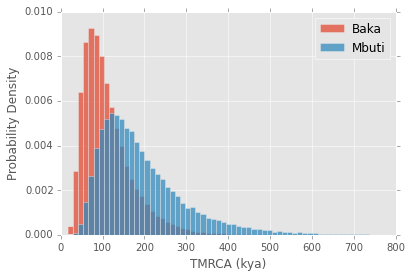

In [32]:
#histogram w/ Pandas

myTicksX = range(0, 1200, 100)
myLimX = [0,800] 

merged = pd.DataFrame({'Mbuti': Mbuti, 'Baka': Baka})
myPlot = merged.plot(kind='hist' , xticks= myTicksX, xlim =myLimX ,alpha=0.75, bins=100, normed = True)

myPlot.set_xlabel('Count')
myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')

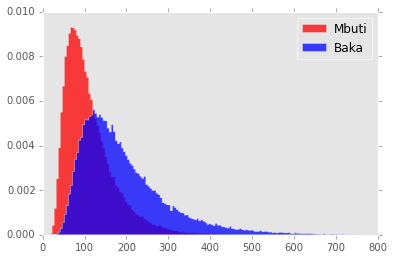

In [81]:
#Same thing with pyPlot

merged =[Mbuti,Baka]
n, bins, patches = P.hist(merged, 250, normed=1, histtype='stepfilled',
                            color=['b', 'r'],
                            label=['Baka', 'Mbuti'])

P.setp(patches, 'alpha', 0.75)
P.ylim(0, 0.010)
P.xlim(0, 800)
P.grid(False)
P.legend()
P.figure()


In [97]:
#Returns effective Y chromosomes and Mito (in that order)

def effectiveChroms(R, Nauto):
    Nf = Nauto*(1 + R)/(4*R)
    Nm = Nf*R
    NchrY = Nm/2
    Nmito = Nf/2
    return NchrY,Nmito

#ex.
#chrY, mito  = effectiveChroms(0.5,56300) 


In [128]:
#Some chimpanzee population test simulations
#Nauto is estimated from the PSMC analysis (Table S5), the sum of the Nes of the 4 subspecies(mu = 1e-9, yrs/gen = 25)
#multipied by 2, since there are two genomes for each individual

Nauto = 56300*2
NchrY, Nmito = effectiveChroms(0.25, Nauto) 

ChimpAuto = DistTMRCA(10000, Nauto, 25)
ChimpY = DistTMRCA(10000, NchrY, 25)
ChimpMito = DistTMRCA(10000, Nmito, 25)

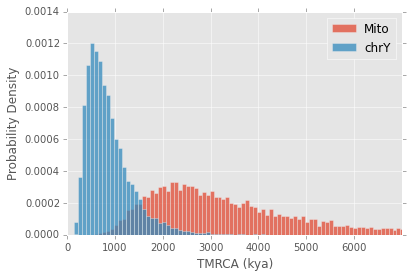

In [137]:
merged = pd.DataFrame({'chrY': ChimpY, 'Mito': ChimpMito})
#merged = pd.DataFrame({'chrY': ChimpY, 'Mito': ChimpMito, 'Auto':ChimpAuto})

xlim = 7000

myTicksX = range(0, xlim,1000)
myLimX = [0,xlim] 
myPlot = merged.plot(kind='hist' , xticks= myTicksX, xlim =myLimX ,alpha=0.75, bins=200, normed = True)

myPlot.set_xlabel('Count')
myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')


#y = P.normpdf( bins, 420, 58.6)
#l = P.plot(bins, y, 'k--', linewidth=1.5)
#P.figure